In [172]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [173]:
bike_file = 'london_merged.csv' 
bike_data = pd.read_csv(bike_file)

In [174]:
bike_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [175]:
bike_data.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


After comparing the first five and last five values of timestamp respectively, it can be concluded that the timeslot is 
already sorted from old to new.

In [176]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [177]:
bike_data.shape

(17414, 10)

In [178]:
bike_data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

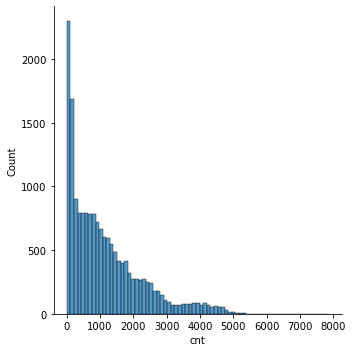

In [179]:
sns.displot(bike_data['cnt'])
plt.show()

In [180]:
bike_data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


Correlation matrix helps us to understand till which extend two variables are correlated.

In [181]:
corr_matrix = bike_data.corr()
corr_matrix

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000


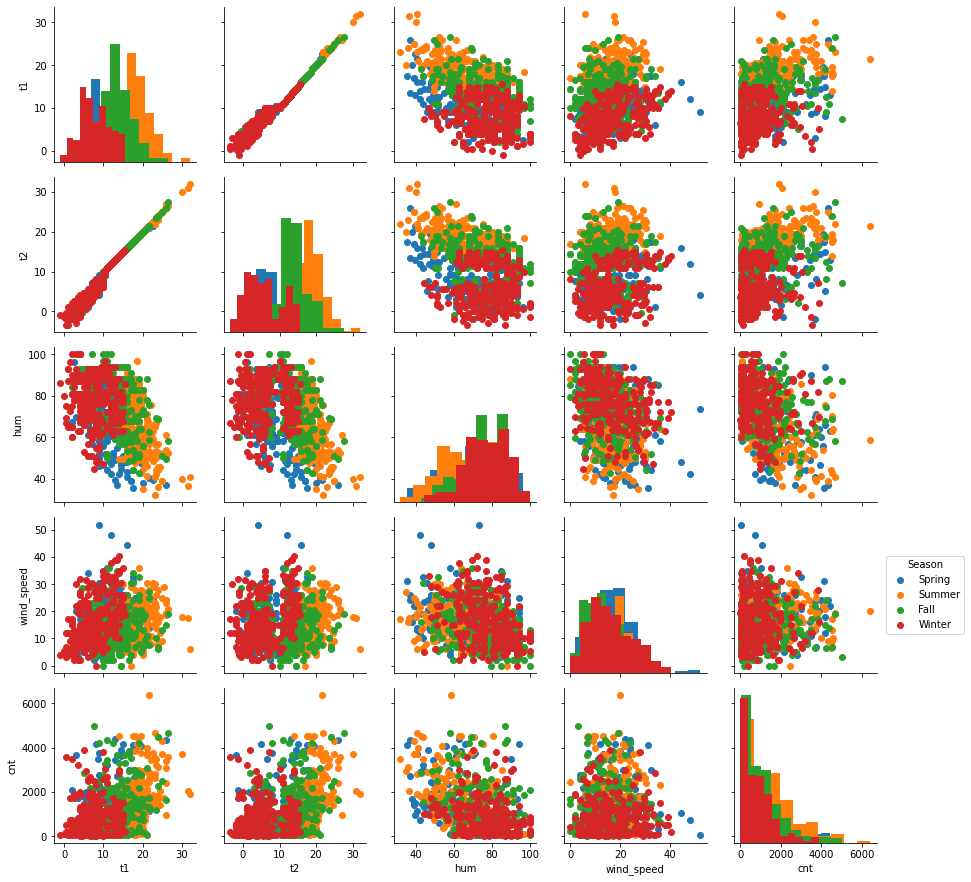

In [182]:
bike_data_sample = bike_data.sample(1000)
p = sns.PairGrid(data=bike_data_sample, vars=['t1', 't2', 'hum', 'wind_speed', 'cnt'], hue='season')
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)
plt.legend(title='Season', loc='center right', bbox_to_anchor=(1.65, 0.5), ncol=1, labels=['Spring', 'Summer', 'Fall', 'Winter'])

In order to incorporate into linear regression model, we will need to extract the hour, day, and month from the timestamp.

In [183]:
bike_data['timestamp'] = pd.to_datetime(bike_data['timestamp']) 
type(bike_data['timestamp'].iloc[0]) 

bike_data['hour']=bike_data['timestamp'].apply(lambda time: time.hour) 
bike_data['month']=bike_data['timestamp'].apply(lambda time: time.month)
bike_data['day_of_week']=bike_data['timestamp'].apply(lambda time: time.dayofweek)

date_names = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} 
bike_data['day_of_week'] = bike_data['day_of_week'].map(date_names)

bike_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,Sun
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,Sun
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,Sun
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,Sun
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,Sun


Visualized the Hour, Month, and Day of Week data using boxplot graphs.

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

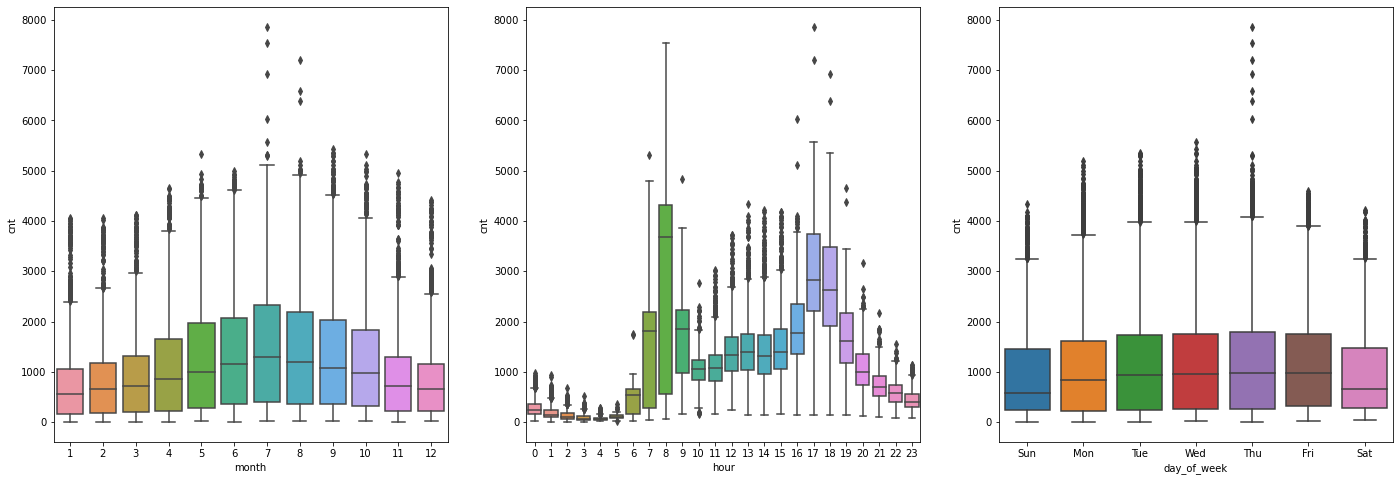

In [184]:
# create box plots for time related variables
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(24, 8)

sns.boxplot(data=bike_data, x='month', y='cnt', ax=ax1)
sns.boxplot(data=bike_data, x='hour', y='cnt', ax=ax2)
sns.boxplot(data=bike_data, x='day_of_week', y='cnt', ax=ax3)

Visualization is done for is_weekend and is_holiday, season, and weather_code on the cnt by Hour using a point plot. A hue will be used to see the effect of these variables.

<AxesSubplot:xlabel='hour', ylabel='cnt'>

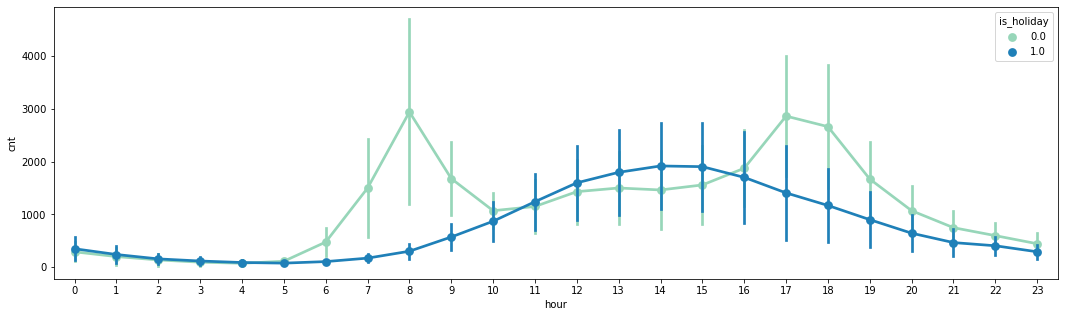

In [185]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data=bike_data, x='hour', y='cnt', ci="sd", hue='is_holiday', ax=ax1, palette='YlGnBu')

It can be concluded that both the weekend and holiday variable have a similar effect

<AxesSubplot:xlabel='hour', ylabel='cnt'>

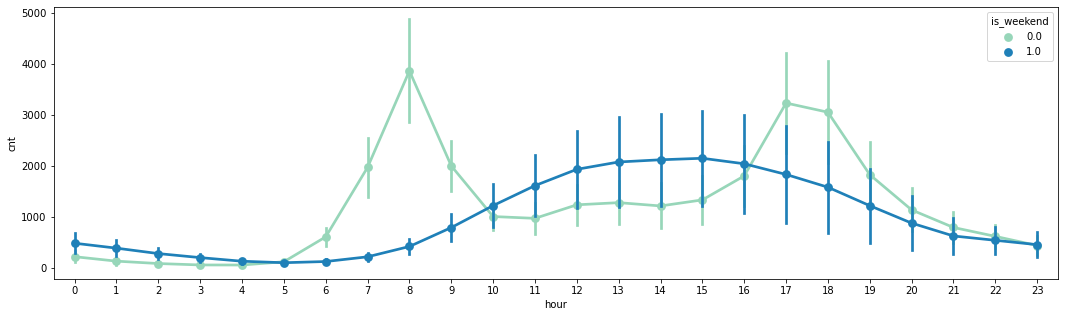

In [186]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data=bike_data, x='hour', y='cnt', ci="sd", hue='is_weekend', ax=ax1, palette='YlGnBu')

It can be concluded that the season has an effect on count but mainly from 8am until midnight, with the biggest effects found in the afternoon during what would be considered peak commute times.

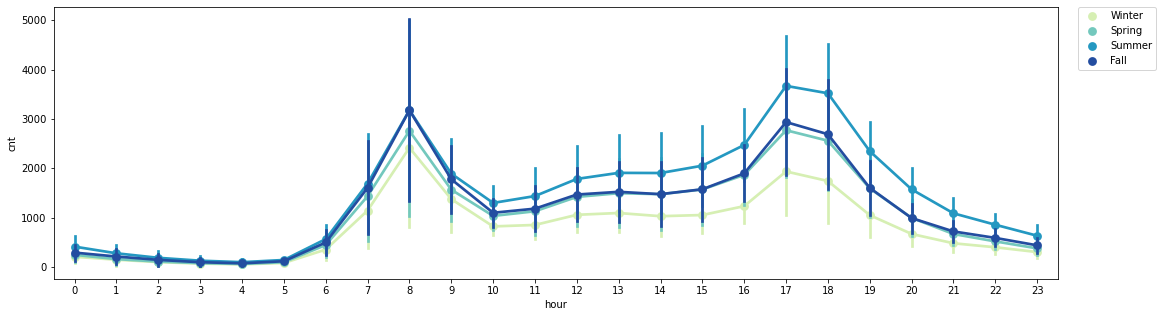

In [187]:
season_names = {0:'Spring',1:'Summer',2:'Fall',3:'Winter'} 
bike_data['season'] = bike_data['season'].map(season_names) 

fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data=bike_data, x='hour', y='cnt', ci="sd", hue='season', ax=ax1, palette='YlGnBu')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Weatheris different than season, with severe weather conditions drastically decreasing.

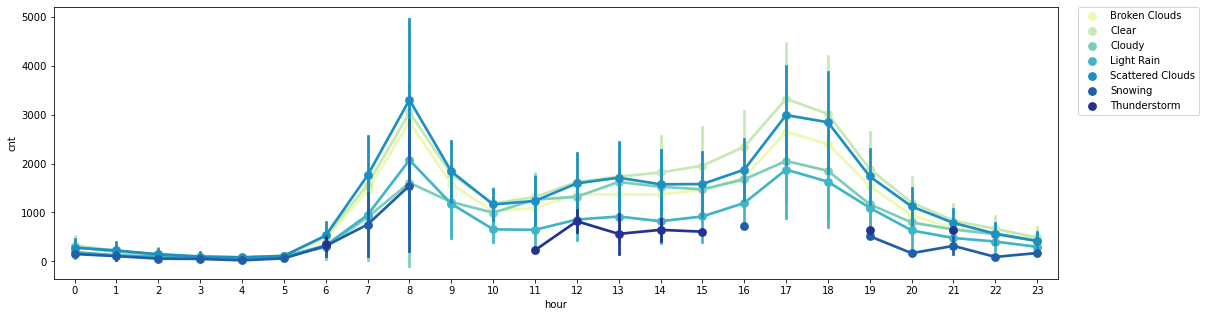

In [188]:
weather_names = {1:'Clear',2:'Scattered Clouds',3:'Broken Clouds',4:'Cloudy',7:'Light Rain',10:'Thunderstorm',26:'Snowing',94:'Freezing Fog'}
bike_data['weather_code'] = bike_data['weather_code'].map(weather_names)

fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data=bike_data, x='hour', y='cnt', ci="sd", hue='weather_code',ax=ax1, palette='YlGnBu')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [189]:
bike_data = pd.read_csv(bike_file)
bike_data.weather_code = bike_data.weather_code.astype(int)
bike_data.is_holiday = bike_data.is_holiday.astype(int)
bike_data.is_weekend = bike_data.is_weekend.astype(int)
bike_data.season = bike_data.season.astype(int)
bike_data['timestamp'] = pd.to_datetime(bike_data['timestamp']) 
type(bike_data['timestamp'].iloc[0]) 

bike_data['hour']=bike_data['timestamp'].apply(lambda time: time.hour) 
bike_data['month']=bike_data['timestamp'].apply(lambda time: time.month)

bike_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,0,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,3,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,4,1


In [190]:
bike_data = pd.get_dummies(bike_data, columns = ['weather_code', 'season','hour','month'],drop_first = True)

bike_data.drop('timestamp', axis=1, inplace=True)

bike_data.head(5)

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,weather_code_2,weather_code_3,weather_code_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,182,3.0,2.0,93.0,6.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,138,3.0,2.5,93.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,134,2.5,2.5,96.5,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,72,2.0,2.0,100.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47,2.0,0.0,93.0,6.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
y = bike_data['cnt']
X = bike_data.drop('cnt', axis=1)

In [192]:
len(y)

17414

In [193]:
y_train = y.head(int(len(y)*(80/100)))

In [194]:
len(y_train)

13931

In [195]:
y_test = y[13932:]

In [196]:
len(y_test)

3482

In [197]:
len(X)

17414

In [198]:
X_train = X.head(int(len(X)*(80/100)))

In [199]:
len(X_train)

13931

In [200]:
X_test = X[13932:]

In [201]:
len(X_test)

3482

5 REGRESSION MODELS

In [202]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,y_train)
slr.predict(X_test)
slr.score(X_test, y_test)

0.691857214819205

In [203]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
clf = RandomForestRegressor(n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.9071378166848133

In [204]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=2,learning_rate=1,depth=2)
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test, y_test)


0:	learn: 886.9623008	total: 3.45ms	remaining: 3.45ms
1:	learn: 781.5510947	total: 6.58ms	remaining: 0us


0.41521336307268175

In [205]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha = 1.0)
krr.fit(X_train,y_train)
krr.predict(X_test)
krr.score(X_test, y_test)

0.6911814189713685

In [206]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X_train, y_train = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
yhat2 = model.predict(X_test)
r2_score(y_test, yhat2)

0.41521336307268175

After testing 5 Regression models, it can be concluded that the best model in my case is RandomForestRegressor with the prediction score of 0.9071378166848133.  